## Introduction to Time Series

Time series refers to time data where sequence is important

Cross sectional refers to time data where sequence is less important

Panel data refers to combination of both cross sectional and time series.

Time series data is used in the following cases:
1. Pattern analysis
2. Anomaly detection
3. Forecasting

## Time Series Components

1. Level: Average value
2. Trend: General pattern of data moving over time (Upwards vs Downwards)
3. Seasonality: Cyclic pattern within a season (usually at least 1 year)
4. Noise: Random data with no pattern

Level, trend and seasonality represents systematic component of time series, while noise represents non-systematic component of time series

## Datetime Index

For time series problems, it is highly recommended to set index of data as datetime for easier visualization and model training

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
date_list = pd.date_range(start='2021-07-01', periods=10, freq='D')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10'],
              dtype='datetime64[ns]', freq='D')

In [2]:
data = pd.read_csv('BrentOilPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2021-01-19,55.38
2021-01-20,55.66
2021-01-21,55.68


In [3]:
# Arbitrary date
print('Arbitrary date: ', end=' ')
print(datetime(year=2021, month=5, day=15))

# Arbitary date and time
print('Date and time:  ', end=' ')
print(datetime(year=2021, month=5, day=15, hour=7, minute=23, second=44))

# Now
print('Date right now: ', end=' ')
print(datetime.now())

# Yesterday
print('Date yesterday: ', end=' ')
print(datetime.now() - timedelta(days=1))

Arbitrary date:  2021-05-15 00:00:00
Date and time:   2021-05-15 07:23:44
Date right now:  2022-11-12 04:42:20.732724
Date yesterday:  2022-11-11 04:42:20.732806


## Time Series Reformatting

Sometimes, time series data would not be in the desired format for time series forecasting. Thus, Pandas library allows the following reformatting processes for time series data:

1. Resampling: changes aggregation level of a time series
2. Shift: Shift entire time series up or down by desired number of periods
3. Rolling: Moving averages
4. Differencing: Used to make time series stationary

In [4]:
# Resampling data to monthly average
data.resample(rule='M').mean()

,Price
Date,
1987-05-31,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182
...,...
2020-09-30,40.909545
2020-10-31,40.189545
2020-11-30,42.692381


In [5]:
# Shifting prices by 2 time period forward
data['Price'].shift(2)

Date
1987-05-20      NaN
1987-05-21      NaN
1987-05-22    18.63
1987-05-25    18.45
1987-05-26    18.55
              ...  
2021-01-19    54.80
2021-01-20    54.21
2021-01-21    55.38
2021-01-22    55.66
2021-01-25    55.68
Name: Price, Length: 8554, dtype: float64

In [6]:
# 5 day rolling average of prices
data['Price'].rolling(window=5).mean()

Date
1987-05-20       NaN
1987-05-21       NaN
1987-05-22       NaN
1987-05-25       NaN
1987-05-26    18.572
               ...  
2021-01-19    55.134
2021-01-20    55.162
2021-01-21    55.146
2021-01-22    55.230
2021-01-25    55.476
Name: Price, Length: 8554, dtype: float64

In [7]:
# Differencing prices by two time period
data['Price'].diff(2)

Date
1987-05-20     NaN
1987-05-21     NaN
1987-05-22   -0.08
1987-05-25    0.15
1987-05-26    0.08
              ... 
2021-01-19    0.58
2021-01-20    1.45
2021-01-21    0.30
2021-01-22   -0.44
2021-01-25   -0.24
Name: Price, Length: 8554, dtype: float64

## Time Series Visualization

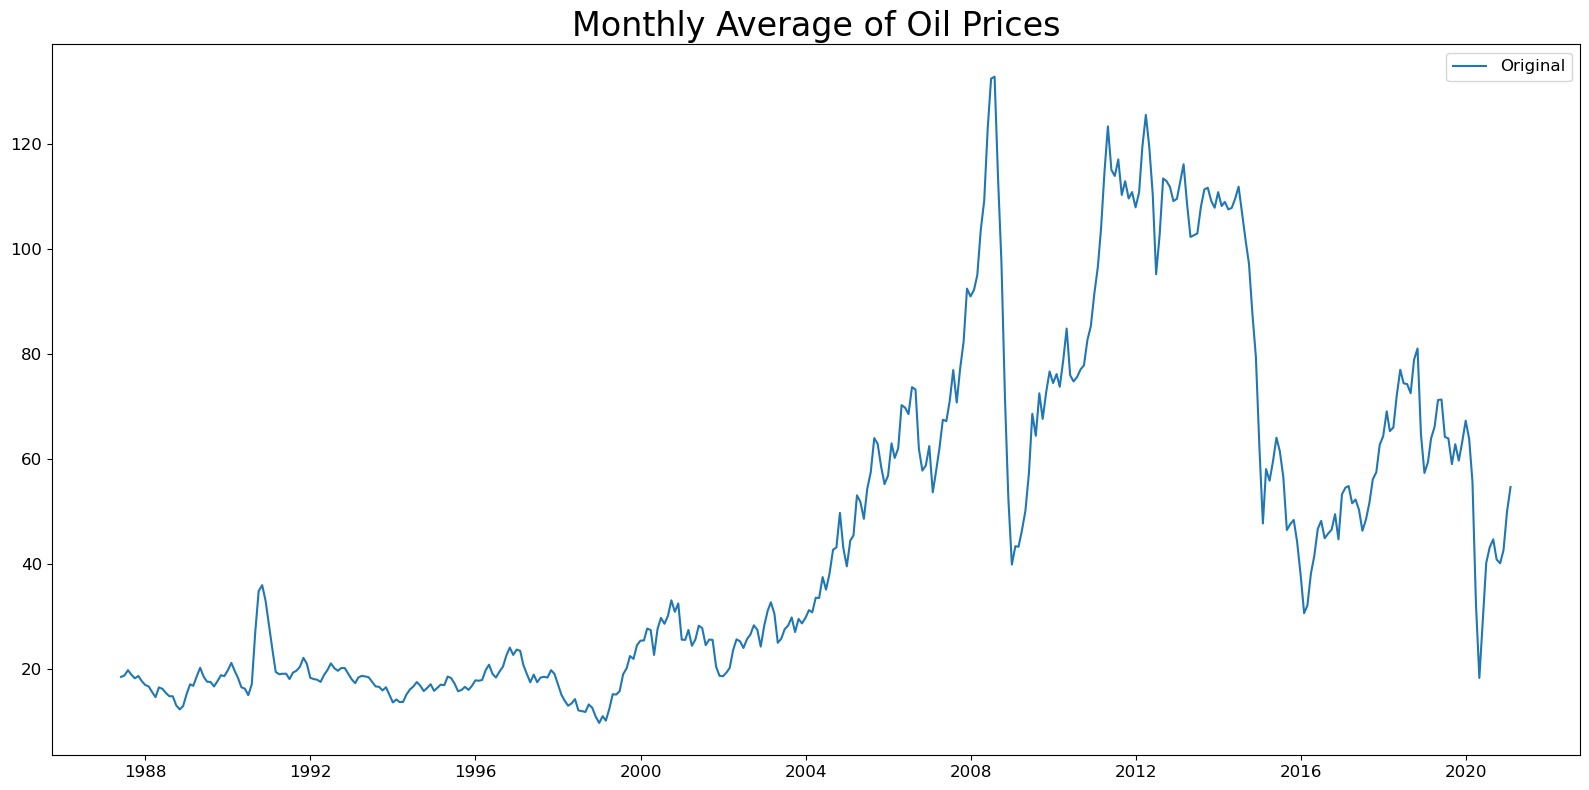

In [8]:
plt.figure(figsize=(16,8))
plt.plot(data.resample(rule='M').mean(), label='Original')
plt.title('Monthly Average of Oil Prices', fontsize=24)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

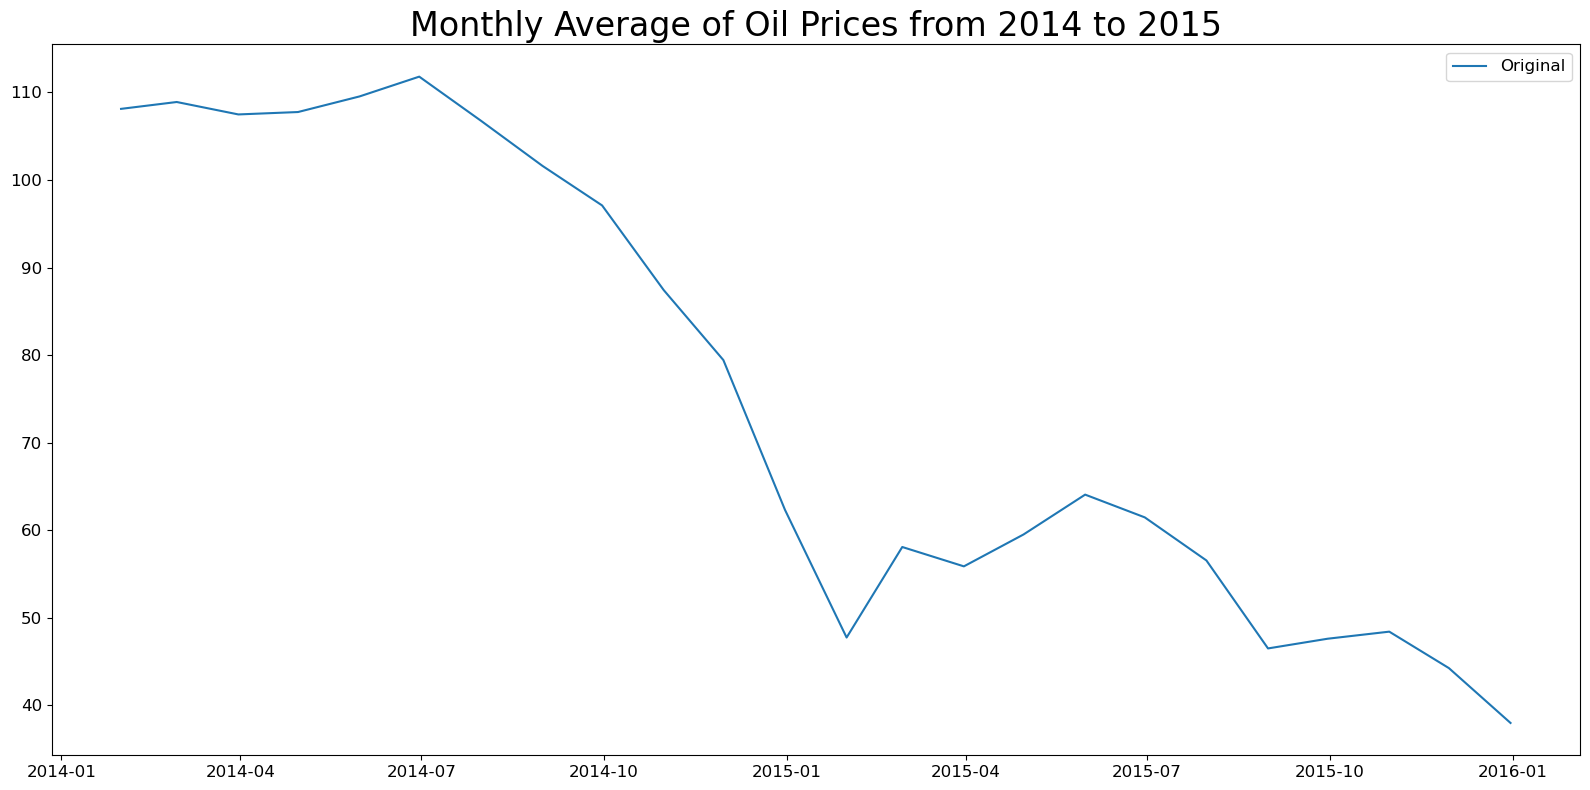

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data.resample(rule='M').mean().loc['2014-01-01':'2015-12-31'], label='Original')
plt.title('Monthly Average of Oil Prices from 2014 to 2015', fontsize=24)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## White Noise

White noise represents a series that is not predictable, since it's a sequence of random numbers. If residuals from time series data looks like white noise, that means the model is already at its best possible state. Visible patterns in residuals suggest that there's a better model for the dataset.

Conditions of white noise:
1. Average value of residuals is zero
2. Standard deviation of residuals is constant over time
3. Correlation between lags is not significant

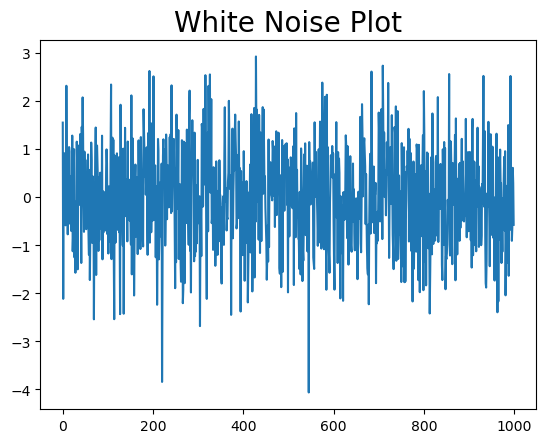

In [10]:
# Example of white noise
white_noise = np.random.randn(1000)
plt.title('White Noise Plot', size=20)
plt.plot(np.arange(len(white_noise)), white_noise)
plt.show()

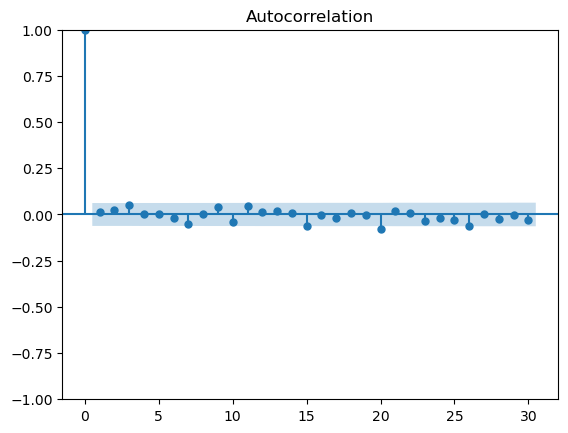

In [11]:
## White noise from ACF plot
plot_acf(np.array(white_noise))
plt.show()

The ACF plot shows that there is no significant correlation between residuals of different lags. Thus, the data is considered to be white noise.

## Random Walk

Random walk is similar to white noise, except that current values depend on previous values.

Just like white noise, random walk series is also not predictable

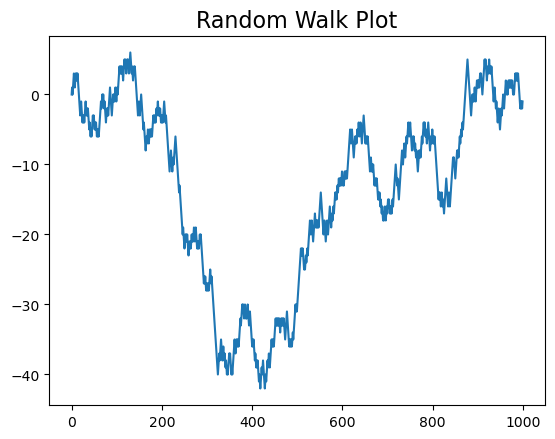

In [12]:
random_walk = [0]
for i in range(1, 1000):
    num = -1 if np.random.random() < 0.5 else 1
    random_walk.append(random_walk[-1] + num)
plt.title('Random Walk Plot', size=16)
plt.plot(np.arange(len(random_walk)), random_walk)
plt.show()

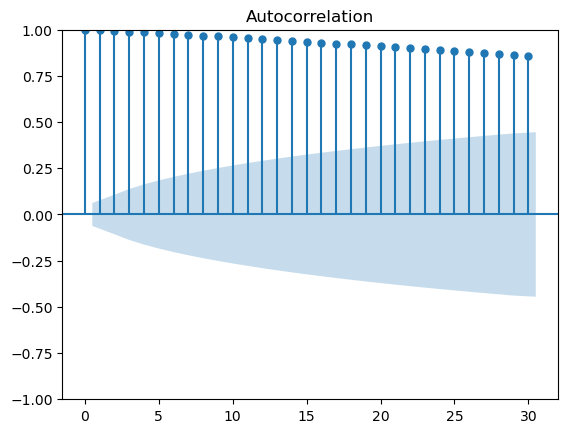

In [13]:
## Random walk from ACF plot
plot_acf(np.array(random_walk))
plt.show()

The ACF plot shows that there is significant correlation between residuals of all different lags. Thus, the data is considered to be random walk.

Note that by differencing random walk data, time series data becomes white noise, where there is no learnable pattern.

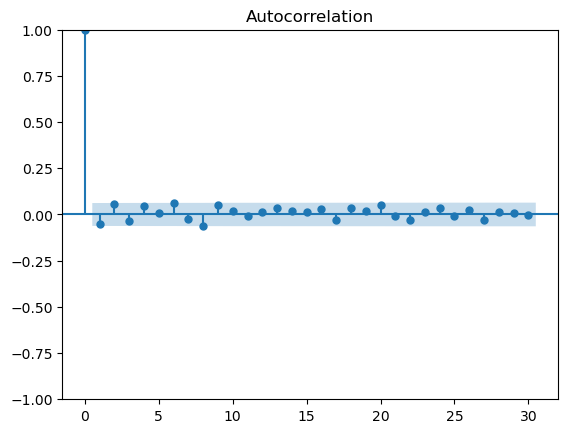

In [14]:
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()
## Random walk from ACF plot
plot_acf(np.array(s_random_walk_diff))
plt.show()

## Time Series Decomposition

Time series decomposition is a process of deconstructing time series into 3 main components:

1. Trend
2. Seasonality
3. Residuals

Decomposing time series requires specification of model type for seasonal component: additive vs multiplicative.

Additive trend: Linear trend

Multiplicative trend: Non-linear trend

Additive seasonality: Seasonal cycles have same frequency (width) and amplitude (height)

Multiplicative seasonality: Seasonal cycles have increasing/decreasing frequency (width) and amplitude (height)

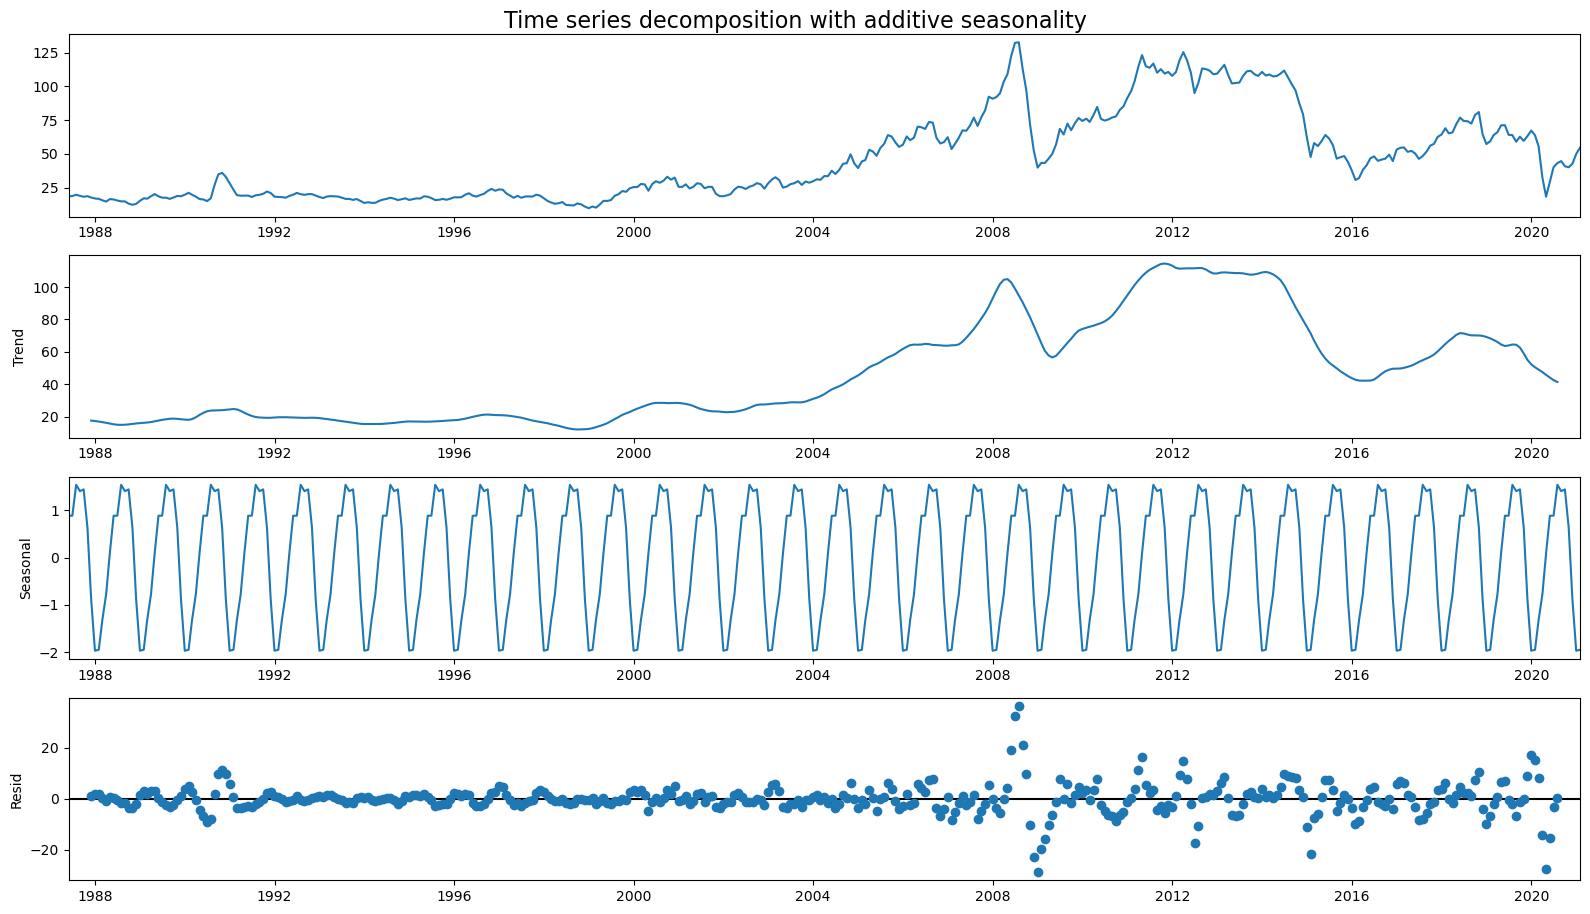

In [15]:
decompose = seasonal_decompose(data.resample(rule='M').mean(), period=12, model = 'additive')
fig = decompose.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
fig.suptitle('Time series decomposition with additive seasonality', y=1.01, size=16)
plt.show()

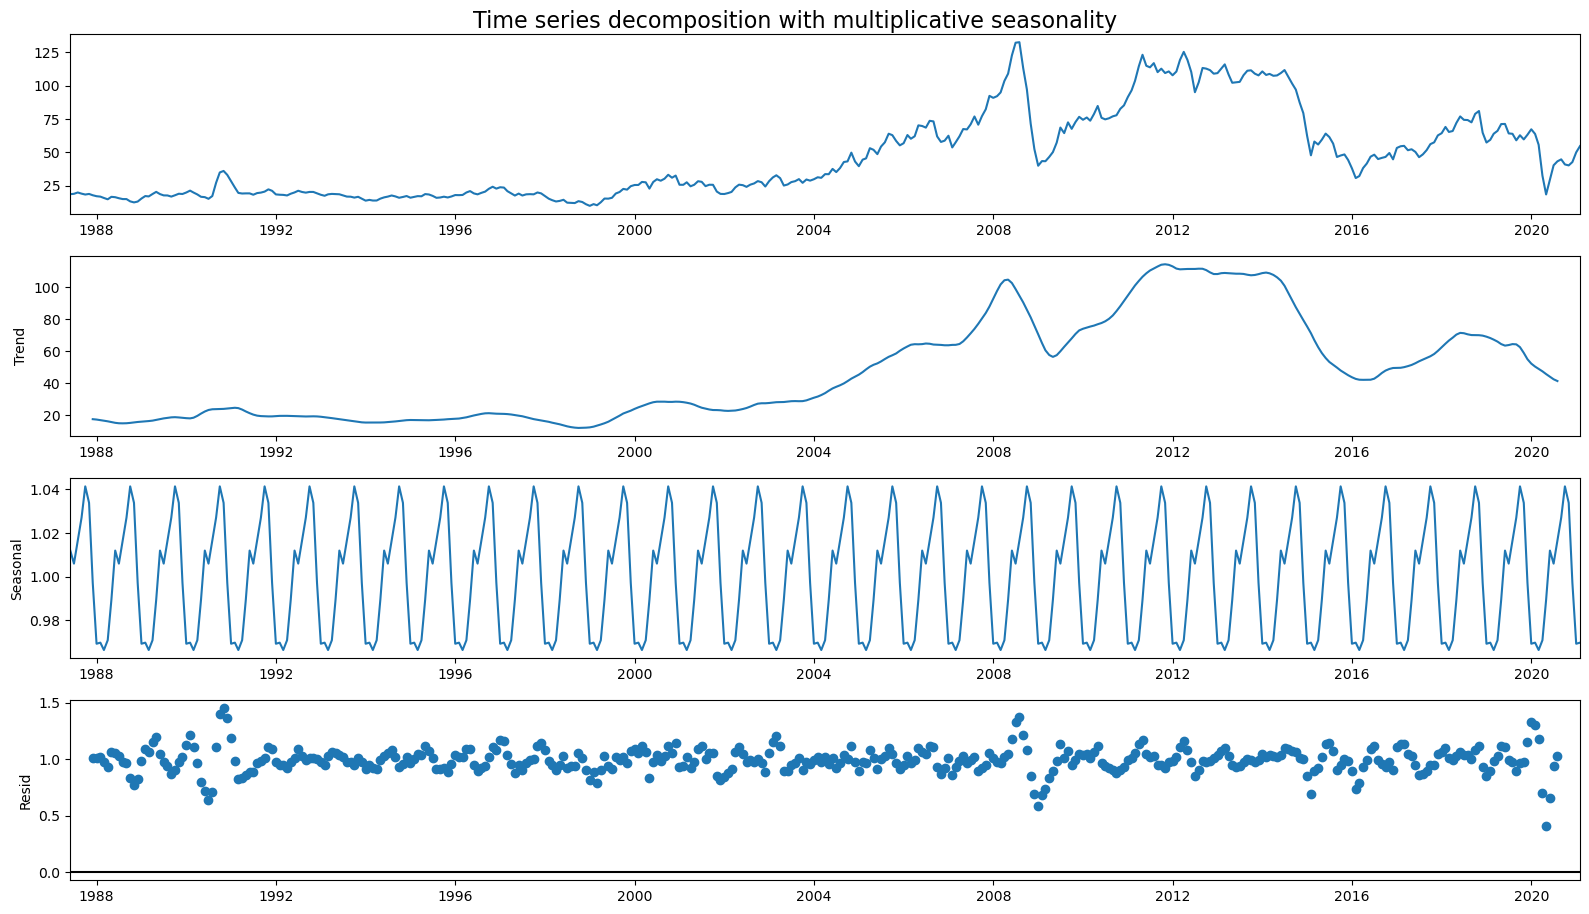

In [16]:
decompose = seasonal_decompose(data.resample(rule='M').mean(), period=12, model = 'multiplicative')
fig = decompose.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
fig.suptitle('Time series decomposition with multiplicative seasonality', y=1.01, size=16)
plt.show()

The plot above shows that trend and seasonal components were well captured. Residuals are mostly centered around 1 with much lower variance, compared to using additive model for seasonality

## Stationary Time Series

A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean, variance and covariance also do not change over time.

Stationary time series can be checked by either using plots or some statistical test.

From plots, a stationary series is centered around some value, doesn’t have too many spikes and unexpected variations, and doesn’t show drastic behavior changes from one part to the other.

Importance of stationarity:
1. Stationary process are easier to analyze
2. Most forecasting algorithms assume series is stationary.

Based on <b>dickey-fuller test</b>:

Null hypothesis (H0) — Time series is not stationary.

Alternative hypothesis (H1) — Time series is stationary.

In [17]:
pd.Series(adfuller(data.resample(rule='M').mean())[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -2.278807
p-value                          0.178894
#Lags Used                       1.000000
Number of Observations Used    403.000000
dtype: float64

Results above shows that p-value is greater than 0.05, indicating there is insufficient evidence to conclude that the time series is stationary. Thus, the null hypothesis is not rejected, which aligns with the plot for time series that indicates non-stationarity.

In [18]:
pd.Series(adfuller(data.resample(rule='M').mean().diff(1).dropna())[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -1.114085e+01
p-value                        3.111081e-20
#Lags Used                     2.000000e+00
Number of Observations Used    4.010000e+02
dtype: float64

Results above shows that p-value is less than 0.05, indicating there is sufficient evidence to conclude that the time series is stationary. Thus, the null hypothesis is rejected, indicating stationarity of time series when first-order differencing is applied.

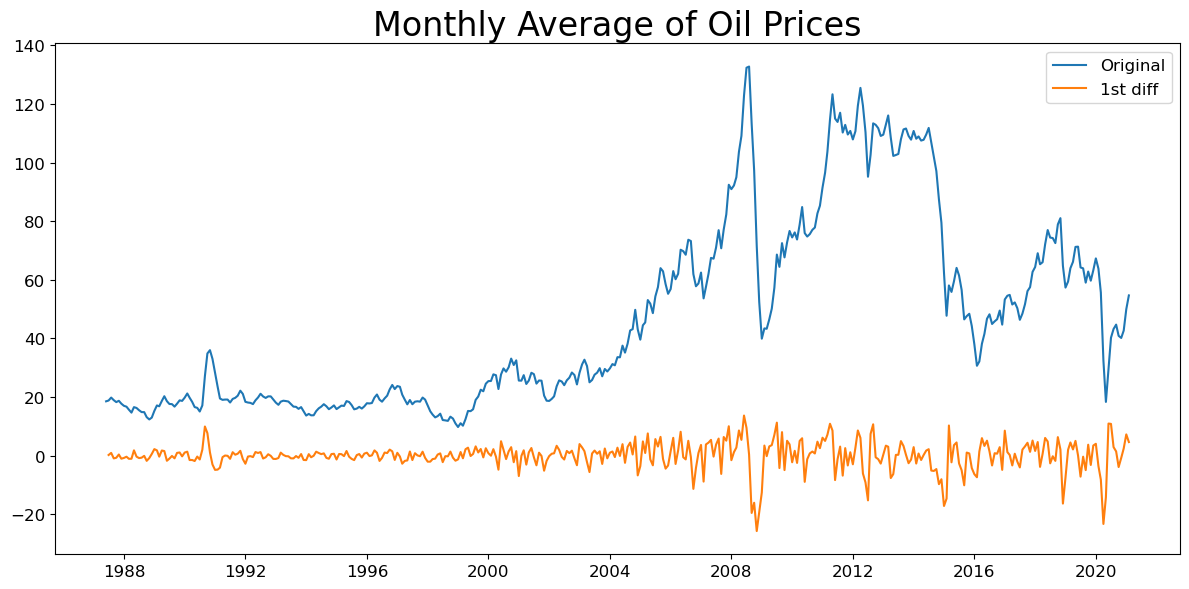

In [19]:
plt.figure(figsize=(12,6))
plt.plot(data.resample(rule='M').mean(), label='Original')
plt.plot(data.resample(rule='M').mean().diff(1).dropna(), label='1st diff')
plt.title('Monthly Average of Oil Prices', fontsize=24)
plt.legend(loc='best', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Autocorrelation and Partial Autocorrelation

Autocorrelation represents the correlation of a sequence with itself lagged by some number of time units. Usually, higher number of lags used indicate lower autocorrelation.

Partial autocorrelation represents the direct effect between current and lagged values. All intermediary effects are removed when computing partial autocorrelation.

Note that time series should be stationary before computing autocorrelation and partial autocorrelation.

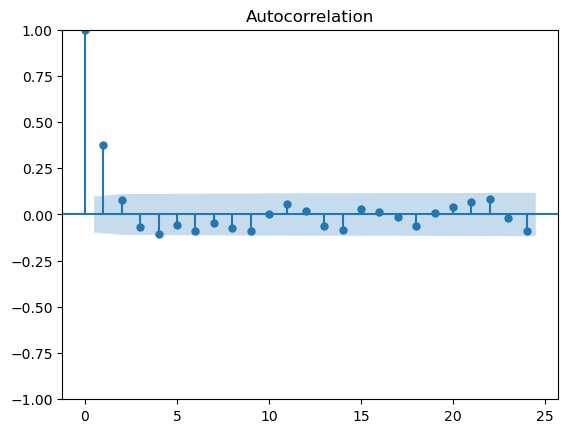

array([ 1.        ,  0.37479625,  0.07963406, -0.06913636, -0.1066055 ,
       -0.05684296, -0.08734423, -0.04616025, -0.07083298, -0.09198099,
        0.00301321,  0.0569447 ,  0.0214737 , -0.06109644, -0.08291716,
        0.02867891,  0.01181252, -0.01310067, -0.06064035,  0.00909776,
        0.03983081,  0.06934616,  0.08320539, -0.0178432 , -0.08989593])

In [20]:
plot_acf(data.resample(rule='M').mean().diff(1).dropna(), lags=24)
plt.show()
acf(data.resample(rule='M').mean().diff(1).dropna(), nlags=24)

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


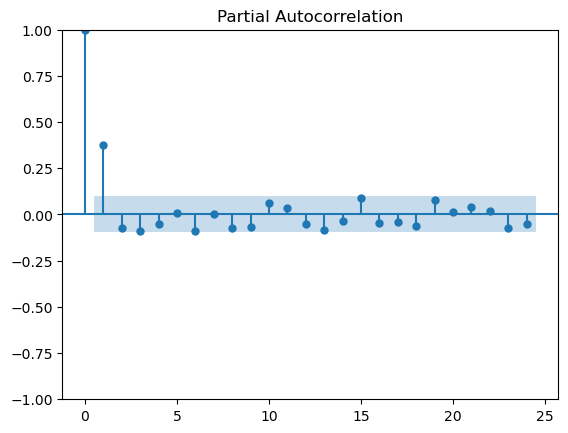

array([ 1.        ,  0.37572627, -0.07118986, -0.08790848, -0.05210487,
        0.00821792, -0.08683036,  0.00329635, -0.07056978, -0.06705264,
        0.05979124,  0.03368619, -0.05220794, -0.08187596, -0.0335553 ,
        0.08845577, -0.04714858, -0.04024571, -0.0637795 ,  0.07989691,
        0.01392387,  0.03933422,  0.01668841, -0.07416415, -0.05021591])

In [21]:
plot_pacf(data.resample(rule='M').mean().diff(1).dropna(), lags=24)
plt.show()
pacf(data.resample(rule='M').mean().diff(1).dropna(), nlags=24)

Interpretation of ACF and PACF plot:

1. If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
2. If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
3. If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
4. If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

While ACF and PACF plots can be interpreted to determine hyperparameters to use for time series models like ARIMA, MA etc., reading ACF and PACF plots is challenging and better alternative is to use hyperparameter tuning methods.

An alternative to check for autocorrelation between residuals is using <b>durbin-watson test</b>.

Null hypothesis: There is no serial correlation between residuals.

Alternative hypothesis: There is serial correlation between residuals.

Note that durbin watson statistic returns values between 0 and 4.

Interpretation of durbin watson statistic:
1. Values between 0 and 1.5 indicate positive serial correlation
2. Values between 1.5 and 2.5 indicate no serial correlation
3. Values between 2.5 and 4 indicate negative serial correlation

In [22]:
durbin_watson(data.resample(rule='M').mean().diff(1).dropna())

array([1.24763381])

Since test statistic is less than 1.5, this indicates there is positive serial correlation between residuals.

## Model evaluation for Time Series

1. <b>Simple holdout</b>: Splitting entire dataset into train and test set by certain time period in sequence.

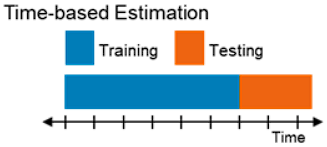

Disadvantage: Doesn't provide true estimate of generalization error

2. <b>Time series split cross validation</b>: Splitting entire dataset into multiple train and test set at fixed size of test set in sequence.

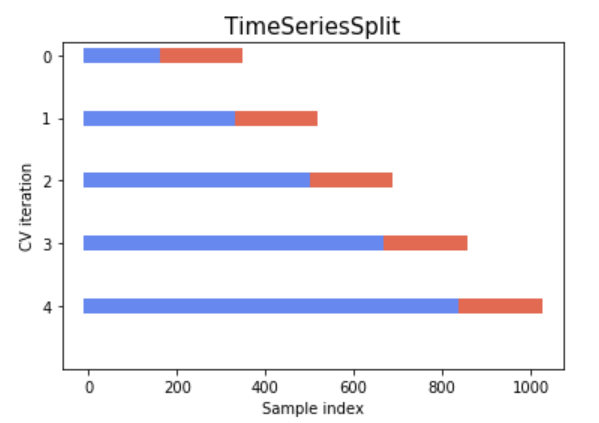

Disadvantage: Introduces data leakage from future data to the model

3. <b>Blocked time series split cross validation</b>: Splitting entire dataset into multiple train and test set at fixed size of train and test set in sequence with margins between train and test folds and between folds used in each iteration.

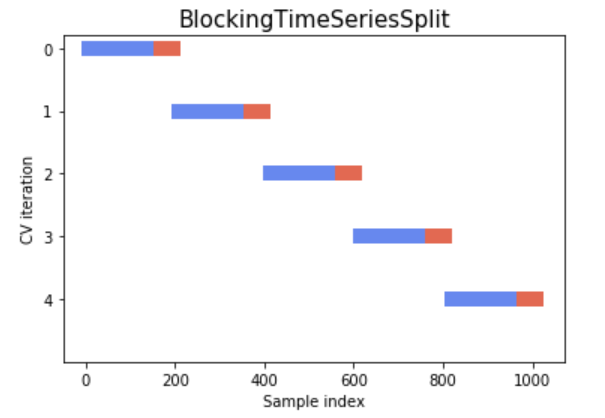

Disadvantage: Computationally expensive

4. <b>Predict 2nd half</b>: Base case of nested CV with only 1 train/validation/test split

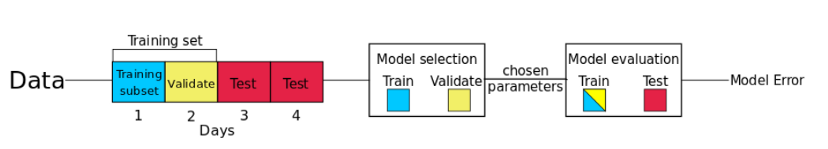

Disadvantage: Arbitrary chosen test set, which may not provide true estimate of generalization error

5. <b>Forward chaining cross validation</b>: Splitting entire dataset into multiple train, validation and test set at fixed size of validation and test set in sequence.

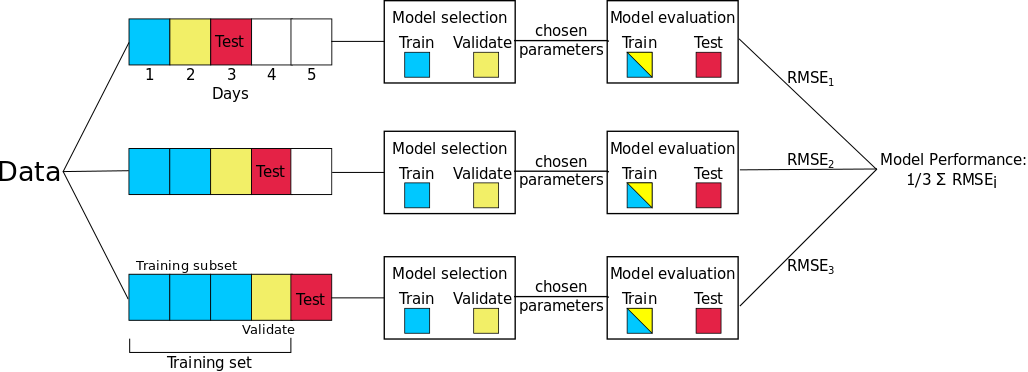

Note that this method provides the most unbiased error estimate.

Disadvantage: Computationally expensive

<b>Important note: Forecasting horizon period shouldn't exceed validation/test period used during model training process.</b>

## Evaluation Metrics for Time Series

The following evaluation metrics can be used for time series:

1. Akaike Information Criterion (AIC): Estimate of constant plus relative distance between unknown true and fitted likelihood function
2. Bayesian Information Criterion (BIC): Estimate of function of posterior probability of model being true under Bayesian setup
3. Root mean squared error (RMSE): Square root difference between actual and predicted values.
4. Mean absolute percentage error (MAPE): Absolute difference between actual and predicted values in percentage terms

<b>Note that AIC and BIC are relative measures that cannot be used to directly compare between different model classes because calculation of AIC/BIC score for different model classes require different initial conditions for computing likelihoods.</b>